<a href="https://colab.research.google.com/github/goondall1/cs236781-tutorials/blob/master/Copy_of_ee046746_hw1_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 1 - Features Descriptors
---

### <a style='color:red'> Due Date: 21.4.2020 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**, on the course website (Moodle). Please refer farther explanation [here](https://moodle.technion.ac.il/mod/groupselect/view.php?id=760560).  


* You can choose your working environment:
    1. `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.


* You should submit two **separated** files:
    1. A compressed `.zip` file, with the name: `ee046746_hw1_id1_id2.zip`, which contains the followings:
        - A folder named `code` with all the code files inside (`.py` or `.ipynb` ONLY!). It is advisable to separate into folders, according to the parts of the exercise (e.g. Part A, Part B).
        - A folder named `output` with all the output files you are requested throughout the assignment.
        - The code should run on every computer and require no special preparation.
    2. A report file with the name `ee046746_hw1_id1_id2.pdf`.
        - The report will include a page or two for each exercise. 
        - The summary should include an explanation of the exercise and how it was run, answers to questions if there were, conclusions and visual results.
    
> Important Notes:    
>* No other file-types (`.docx`, `.html`, ...) will be accepted.
>* **No handwritten submissions**.


### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `opencv` (or `scikit-image`)
* `scikit-learn`
* `scipy`
* Anything else you need (`os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Introduction 
---
In this homework, we will implement an interest point (keypoint) detector similar to SIFT. Then, we will describe the region around each keypoint using a feature descriptor.
In class, we have seen the SIFT keypoint extraction and description extraction. In this HW, we will implement the BRIEF, which is another commonly used feature descriptor.
The BRIEF is more compact and quicker, which allows real-time computation. Additionally, its performance is powerful just as more complex descriptors like SIFT for many cases.

#### Part 1 - Keypoint Detector
---
The first part will include implementing an interest point detector, similar to SIFT. Additional details for the chosen implementation can be found in [2]. 
In order to find keypoints, we will use the Difference of Gaussian (DoG) detector [1]. We will use a simplified version of (DoG) as described in section 3 of [2]. 

NOTE: The parameters to use for the following sections are:
$$\sigma_0 = 1, k =\sqrt 2, levels = [-1; 0; 1; 2; 3; 4], \theta_c = 0.03 \text{ and } \theta_r = 12$$

* For the following sections (part 1), add all your functions to one file named `my_keypoint_det.py` or `my_keypoint_det.ipynb`



##### 1.1 Load Image
Load the `model_chickenbroth.jpg` image and show it:

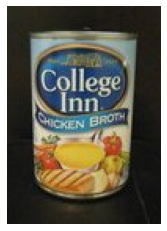

In [0]:
# imports for hw1 (you can add any other library as well)
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

im = cv2.imread('/content/data/model_chickenbroth.jpg')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
_ = plt.axis('off')


##### 1.2 Gaussian Pyramid
Before we construct a DoG pyramid, we need to construct a Gaussian Pyramid by progressively applying a low pass Gaussian filter to the input image.
We provide you the following function `createGaussianPyramid` which gets a grayscale image with values between 0 to 1 (hint: normalize your input image and convert to grayscale). This function outputs GaussianPyramid matrix, which is a set of $L=len(levels)$ blurred images.

What is the shape of GaussianPyramid matrix?

In [0]:
def createGaussianPyramid(im, sigma0, k, levels):
    GaussianPyramid = []
    for i in range(len(levels)):
        sigma_ = sigma0 * k ** levels[i]
        size = int(np.floor( 3 * sigma_ * 2) + 1)
        blur = cv2.GaussianBlur(im,(size,size),sigma_)
        GaussianPyramid.append(blur)
    return np.stack(GaussianPyramid)

Gaussian Matrix shape is: (6, 139, 98)


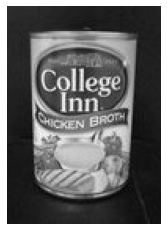

In [0]:
sigma0 = 1
k = np.sqrt(2)
levels = [-1,0,1,2,3,4]
grayscale_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
normalize_im = grayscale_im /255
#print(normalize_im)
plt.imshow(normalize_im,cmap = 'gray')
_ = plt.axis('off')
GaussianPyramid = createGaussianPyramid(normalize_im,sigma0,k,levels)
print("Gaussian Matrix shape is:", GaussianPyramid.shape)


Use the following function to visualize your pyramid. 
* Add the results to your PDF report.

In [0]:
def displayPyramid(pyramid):
    plt.figure(figsize=(16,5))
    plt.imshow(np.hstack(pyramid), cmap='gray')
    plt.axis('off')

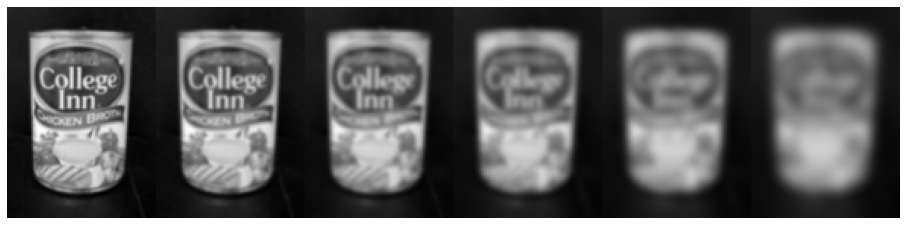

In [0]:
displayPyramid(GaussianPyramid)

Short example of using the above functions:

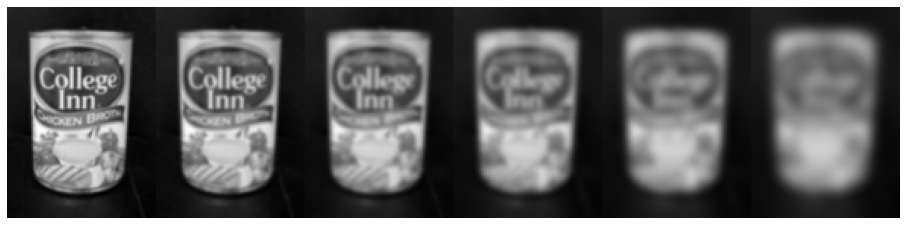

In [0]:
# example:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = im / 255
sigma0 = 1
k = np.sqrt(2)
levels = [-1, 0, 1, 2, 3, 4]
GaussianPyramid =  createGaussianPyramid(im, sigma0, k, levels) 
displayPyramid(GaussianPyramid)


##### 1.3 The DoG Pyramid
In this section we will construct the DoG pyramid. Each level of the DoG is constructed by substructing two levels of the Gaussian pyramid:

$$D_l(x,y,\sigma_l) = (G(x,y,\sigma_{l-1})-G(x,y,\sigma_l))*I(x,y)$$

Where $G(x,y,\sigma_l)$ is the Gaussian filter used at level $l$ in the Gaussian pyramid, $I(x,y)$ is the original image, and $*$ is the *convolution* operator.

We can simplify the eqution due to the distributive property of convolution:

$$D_l(x,y,\sigma_l) = G(x,y,\sigma_{l-1})*I(x,y)-G(x,y,\sigma_l)*I(x,y)=GP_l-GP_{l-1}$$

Where $GP_l$ is the level $l$ in the Gaussian pyramid.

* Write the following function to constract a DoG:

In [0]:

def createDoGPyramid(GaussianPyramid, levels):
    # Produces DoG Pyramid
    # inputs
    # Gaussian Pyramid - A matrix of grayscale images of size
    #                    (len(levels), shape(im))
    # levels      - the levels of the pyramid where the blur at each level is
    #               outputs
    # DoG Pyramid - size (len(levels) - 1, shape(im)) matrix of the DoG pyramid
    #               created by differencing the Gaussian Pyramid input
    
   DoGPyramid = np.zeros((len(levels) - 1,im.shape[0],im.shape[1]))
   DoGLevels = levels #TODO: need to check what is DOG LEVELS
   for i in range(1,len(levels)): # from 1 to len(levels) - 1
    DoGPyramid[i - 1] = cv2.filter2D(GaussianPyramid[i - 1],-1,im) - cv2.filter2D(GaussianPyramid[i],-1,im) #-1 means the output dim same as input dim

   return DoGPyramid, DoGLevels

In [0]:
DoGPyramid,DoGLevels = createDoGPyramid(GaussianPyramid,levels)

This function should return DoGPyramid an $(L-1)\times imH \times imW$ matrix, where $imH\times imW$ is the original image resolution.

##### 1.4 Edge Suppression
The Difference of Gaussian function responds strongly on corners and edges in addition to blob-like objects. However, edges are not desirable for feature extraction as they are not as distinctive and do not provide a substantially stable localization for keypoints.

Here, we will implement the edge removal method described in Section 4.1 of [2], which is based on the principal curvature ratio in a local neighborhood of a point. The paper presents the observation that edge points will have a "large principal curvature across
the edge but a small one in the perpendicular direction."


* Implement the following function:

In [0]:
def computePrincipalCurvature(DoGPyramid):
    # Edge Suppression
    #  Takes in DoGPyramid generated in createDoGPyramid and returns
    #  PrincipalCurvature,a matrix of the same size where each point contains the
    #  curvature ratio R for the corre-sponding point in the DoG pyramid
    # 
    #  INPUTS
    #  DoG Pyramid - size (len(levels) - 1, shape(im)) matrix of the DoG pyramid
    # 
    #  OUTPUTS
    #  PrincipalCurvature - size (len(levels) - 1, shape(im)) matrix where each 
    #                       point contains the curvature ratio R for the 
    #                       corresponding point in the DoG pyramid
  PrincipalCurvature = np.zeros((len(levels) - 1,im.shape[0],im.shape[1]))
  mat = np.zeros((im.shape[0],im.shape[1]))
  for i in range(0,(len(levels) - 1)): # from 1 to len(levels) - 1
    mat = DoGPyramid[i]
    #calc all deriatives
    der_xx = cv2.Sobel(mat,cv2.CV_64F,2,0)
    der_yy = cv2.Sobel(mat,cv2.CV_64F,0,2)
    der_x = cv2.Sobel(mat,cv2.CV_64F,1,0)
    der_y = cv2.Sobel(mat,cv2.CV_64F,0,1)
    der_yx = cv2.Sobel(der_y,cv2.CV_64F,1,0)
    der_xy = cv2.Sobel(der_x,cv2.CV_64F,0,1)
    trace = der_yy + der_xx
    det = der_xx * der_yy - der_yx * der_xy
    PrincipalCurvature[i] = np.square(trace) / det
  #print(PrincipalCurvature.shape)  


  return PrincipalCurvature

The function takes in DoGPyramid generated in the previous section and returns PrincipalCurvature, a matrix of the same size where each point contains the curvature ratio R for the corresponding point in the DoG pyramid:

$ R = \frac{TR(H)^2}{Det(H)} = \frac{(\lambda_{min}+\lambda_{max})^2}{\lambda_{min}\lambda_{max}}$

where H is the Hessian of the Difference of Gaussian function (i.e. one level of the DoG pyramid) computed by using pixel differences as mentioned in Section 4.1 of [2]. **Use the Sobel filter to  compute the second order derivatives** (hint: cv2.Sobel()).

$ H = \begin{bmatrix}
D_{xx} & D_{xy}\\
D_{yx} & D_{yy}
\end{bmatrix}$

This is similar in spirit to but different than the Harris corner detection matrix you saw in class. Both methods examine the eigenvalues $\lambda$ of a matrix, but the method in [2] performs a test without requiring the direct computation of the eigenvalues. Note that you need to compute each term of the Hessian before being able to take the trace and
determinant.

We can see that R reaches its minimum when the two eigenvalues $\lambda_{min}$ and $\lambda_{max}$ are equal, meaning that the curvature is the same in the two principal directions. Edge points, in general, will have a principal curva
ture significantly larger in one direction
than the other. To remove edge points, we simply check against a threshold R > $\theta_r$.
<!-- Fig. 3 shows t
he DoG detector with and without edge suppression. -->

##### 1.5 Detecting Extrema
To detect corner-like, scale-invariant interest points, the DoG detector chooses points that are local extrema in both scale and space. Here, we will consider a point’s eight neighbors in space and its two neighbors in scale (one in the scale above and one in the scale below).
* write the function:

In [0]:
import scipy.ndimage.filters as filters

def getLocalExtrema(DoGPyramid, DoGLevels, PrincipalCurvature, 
                    th_contrast, th_r): 
    #     Returns local extrema points in both scale and space using the DoGPyramid
    #     INPUTS
    #         DoG_pyramid - size (len(levels) - 1, imH, imW ) matrix of the DoG pyramid
    #         DoG_levels  - The levels of the pyramid where the blur at each level is
    #                       outputs
    #         principal_curvature - size (len(levels) - 1, imH, imW) matrix contains the
    #                       curvature ratio R
    #         th_contrast - remove any point that is a local extremum but does not have a
    #                       DoG response magnitude above this threshold
    #         th_r        - remove any edge-like points that have too large a principal
    #                       curvature ratio
    #      OUTPUTS
    #         locsDoG - N x 3 matrix where the DoG pyramid achieves a local extrema in both
    #                scale and space, and also satisfies the two thresholds.

    #building the maximum filter
    footprint_matrix = np.zeros((3,3,3))
    footprint_matrix[0, 1, 1] = 1
    footprint_matrix[2, 1, 1] = 1
    footprint_matrix[1, :, :] = 1
    local_maxima = filters.maximum_filter(DoGPyramid, footprint=footprint_matrix)
    local_maxima = (local_maxima == DoGPyramid)
    
    larger_than_th_c = DoGPyramid > th_contrast
    larger_than_th_r = PrincipalCurvature > th_r
    
    ret_bool_matrix = larger_than_th_r == larger_than_th_c
    ret_bool_matrix = ret_bool_matrix == local_maxima

    locsDoG = np.argwhere(ret_bool_matrix==True)
    #print(locsDoG)
    temp = locsDoG[:,0].copy()
    locsDoG[:,0] = locsDoG[:,2]
    #print(locsDoG)
    locsDoG[:,2] = temp
    
    #print(locsDoG.shape)
    
    return locsDoG


#getLocalExtrema(DoGPyramid,DoGLevels,computePrincipalCurvature(DoGPyramid),0.03,12)

This function takes as input `DoGPyramid` and `DoGLevels` from Section 1.3 and `PrincipalCurvature` from Section 1.4. It also takes two threshold values, `th_contrast` and `th_r`. The threshold $\theta_c$ should remove any point that is a local extremum but does not have a Difference
of Gaussian (DoG) response magnitude above this threshold (i.e. $|D(x, y, \sigma)| > \theta_c$). The threshold $\theta_r$ should remove any edge-like points that have too large a principal curvature ratio specified by `PrincipalCurvature`.

The function should return `locsDoG`, a $N \times 3$  ($N$ is the number of the detected extrema points) matrix where the DoG pyramid achieves a local extrema in both scale and space, and also satisfies the two thresholds. The first and second column of `locsDoG` should be the $(x, y)$ values of the local extremum and the third column should contain the corresponding level of the DoG pyramid where it was detected (try to eliminate loops in the function so that it runs efficiently).

NOTE: In all implementations, we assume the $x$ coordinate corresponds to
columns and $y$ coordinate corresponds to rows. For example, the coordinate
$(10, 20)$ corresponds to the (row 20, column 10) in the image.




##### 1.6 Putting it Together
* Write the following function to combine the above parts into a DoG detector:

In [0]:
def DoGdetector(im, sigma0, k, levels,
    th_contrast, th_r):
    #     Putting it all together
    #     Inputs          Description
    #     --------------------------------------------------------------------------
    #     im              Grayscale image with range [0,1].
    #     sigma0          Scale of the 0th image pyramid.
    #     k               Pyramid Factor.  Suggest sqrt(2).
    #     levels          Levels of pyramid to construct. Suggest -1:4.
    #     th_contrast     DoG contrast threshold.  Suggest 0.03.
    #     th_r            Principal Ratio threshold.  Suggest 12.
    #     Outputs         Description
    #     --------------------------------------------------------------------------
    #     locsDoG         N x 3 matrix where the DoG pyramid achieves a local extrema
    #                     in both scale and space, and satisfies the two thresholds.
    #     gauss_pyramid   A matrix of grayscale images of size (len(levels),imH,imW)
  
    GaussianPyramid = createGaussianPyramid(im, sigma0, k, levels)
    DoGPyramid,DoGLevels = createDoGPyramid(GaussianPyramid, levels)
    PrincipalCurvature = computePrincipalCurvature(DoGPyramid)
    locsDoG = getLocalExtrema(GaussianPyramid,DoGLevels,PrincipalCurvature,th_contrast,th_r)
    return locsDoG, GaussianPyramid


In [0]:

def displayPyramidLocDoG(locsDoG, DoGPyramid):
    imX = locsDoG[0]
    imY = locsDoG[1]
    level = locsDoG[2]
    #print(DoGPyramid.shape[0])
    for i in range(DoGPyramid.shape[0]):
        displayPyramidLocDoGAux(DoGPyramid, imX, imY, level, i)
    return


def displayPyramidLocDoGAux(DoGPyramid, imX, imY, level, curr_level):
    plt.figure(figsize=(18, 8))
    plt.imshow(DoGPyramid[curr_level, :, :], cmap='gray')
    plt.axis('off')
    plt.plot(imX[level == curr_level], imY[level == curr_level], '.g')
    plt.title("level: {} ".format(curr_level))
    plt.show(block=True)
    cv2.destroyAllWindows()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


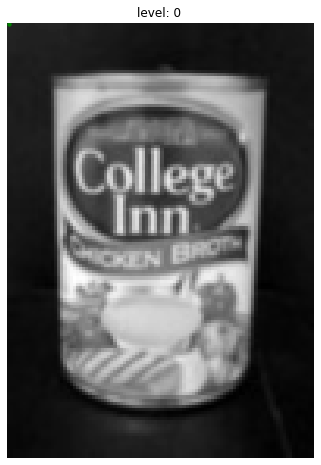

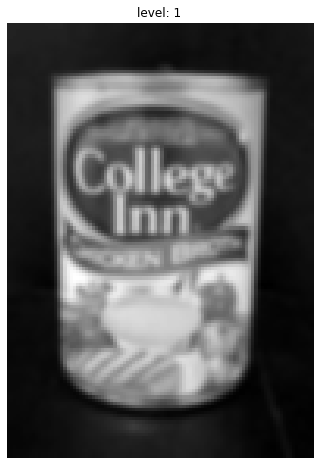

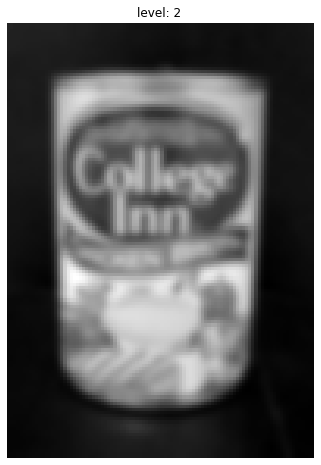

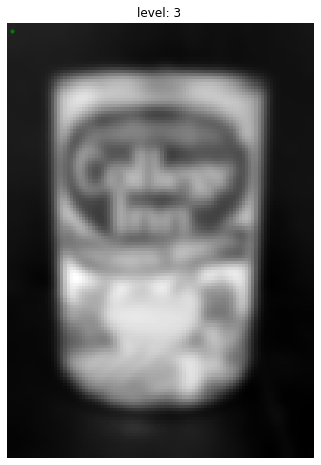

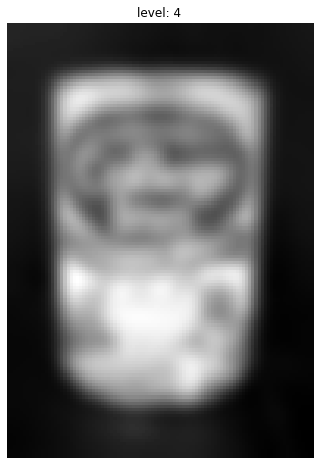

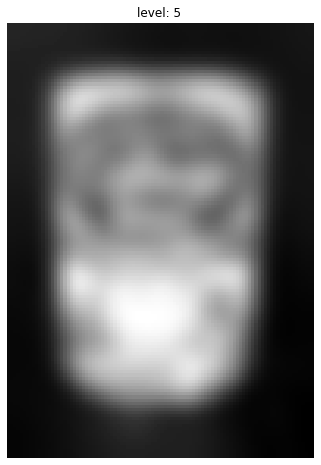

In [0]:
loc,gaus_pyramid = DoGdetector(normalize_im,sigma0,k,levels,0.03,12)


displayPyramidLocDoG(loc, gaus_pyramid)

#print(gaus_pyramid.shape)
#print(loc.shape)
#import matplotlib.pyplot as plt
#from matplotlib.patches import Circle

# Get an example image
#import matplotlib.cbook as cbook
#img = im

#y = loc[:,0]
#x = loc[:,1]
#lvl = loc[:, 2]

# Create a figure. Equal aspect so circles look circular
#fig,ax = plt.subplots(1)
#ax.set_aspect('equal')

# Show the image
#ax.imshow(img)

# Now, loop through coord arrays, and create a circle at each x,y pair
#for xx,yy,sig in zip(x,y,lvl):
 #   circ = Circle((xx,yy),50)
 #   ax.add_patch(circ)

# Show the image
#plt.show()

The function should take in a grayscale image, `im`, scaled between 0 and 1, and the parameters `sigma0, k, levels, th_contrast`, and `th_r`. It should use each of the above functions and return the keypoints in `locsDoG` and the Gaussian pyramid in `GaussianPyramid`.
Note that we are dealing with real images here, so your keypoint detector may find points with high scores that you do not perceive to be corners.

* Include the image with the detected keypoints in your PDF report. You can use any of the provided images.
* Take a step outside (if the government allows) take a picture, and apply your keypoints detector. Do you get reasonable results? How can you improve the results? Add the result and discussion to your report.

#### Part 2 - BRIEF Descriptor
---
Now that we have interest points that tell us where to find the most informative feature points in the image, we would like to describe each keypoint region with a descriptor. Then we can use those descriptors to match corrasponding points between different images. The BRIEF descriptor encodes information from a 9 × 9 patch $p$ centered around the interest point at the characteristic scale of the
interest point. You can read more in
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_brief/py_brief.html">BRIEF</a>.

* For the following sections (part 2), add all your functions to one file named `my_BRIEF.py` or `my_BRIEF.ipynb`.


#### 2.1 Creating a Set of BRIEF Tests
The descriptor itself is a vector that is $n$-bits long, where each bit is the result of the following simple test:

$ \rho(p;x,y):= \begin{cases}
1, & \text{ if } p(x)<p(y) \\ 
 0, & \text{ otherwise. } \\
\end{cases}\\
\\
x,y \in N^{S^2}\\
p \in R^{S^2}
$

Where $S=9$ is the width and hight sizes of a patch $p$, so $x,y$ are each a pixel location within a flatten patch.
Set $n$ to 256 bits. There is no need to encode the test results as actual bits. It is fine to encode them as a 256 element vector. 

There are many choices for the 256 test pairs $(x,y)$ used to compute $\rho (p; x,y)$ (each of the $n$ bits). The authors describe and test some of them in <a href="https://www.tugraz.at/fileadmin/user_upload/Institute/ICG/Images/team_lepetit/publications/calonder_eccv10.pdf">[3]</a>. Read section 3.2 of that paper and implement one of these solutions. You should generate a static set of test pairs and save that data to a file. You will use these pairs for all subsequent computations of the BRIEF descriptor.

* Write the function to create the $x$ and $y$ pairs that we will use for comparison to compute $\rho$ :

In [0]:
def makeTestPattern(patchWidth, nbits):
    """
    Your code here
    """
    return compareX, compareY


`patchWidth` is the width of the image patch (usually 9) and `nbits` is the number of tests $n$ in the BRIEF descriptor. `compareX` and `compareY` are linear indices into the `patchWidth` $\times$ `patchWidth` image patch and are each `nbits` $\times$ 1 vectors. Run this routine for the given parameters `patchWidth = 9` and `n = 256` and save the results in `testPattern.mat`. You can use `scipy.io.savemat()`. <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html#scipy.io.savemat">Read more here</a>.

* Include this file in your submission (`code` directory).

#### 2.2  Compute the BRIEF Descriptor
Now we can compute the BRIEF descriptor for the detected keypoints.
* Write the function:


In [0]:
def computeBrief(im, GaussianPyramid, locsDoG, k, levels,
compareX, compareY):
    """
    Your code here
    """
    return locs,desc


Where `im` is a grayscale image with values from 0 to 1, `locsDoG` are the keypoint locations returned by the DoG detector from Section 1.6, `levels` are the Gaussian scale levels that were given in Section 1, and `compareX` and `compareY` are the test patterns computed in Section 2.1 and were saved into `testPattern.mat` (load them with `scipy.io.loadmat()`, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html">read more</a>).

The function returns `locs`, an $m \times 3$ vector, where the first two columns are the image coordinates of keypoints and the third column is the pyramid level of the keypoints, and desc is an $m \times n$ bits matrix of stacked BRIEF descriptors. `m` is the number of valid descriptors in the image and will vary. You may have to be careful about the input DoG detector locations since they may be at the edge of an image where we cannot extract a full patch of width `patchWidth`. Thus, the number of output locs may be less than the input `locsDoG`. Note: Its possible that you may not require all the arguments to this function to compute the desired output. They have just been provided to permit the use of any of some different approaches to solve this problem.

#### 2.3  Putting it all Together
* Write a function:


In [0]:
def briefLite(im):
    """
    Your code here
    """
    return locs, desc

Which accepts a grayscale image `im` with values between 0 and 1 and returns `locs`, an $m \times 3$ vector, where the first two columns are the image coordinates of keypoints and the third column is the pyramid level of the keypoints, and `desc`, an $ m \times n$ bits matrix of stacked BRIEF descriptors. `m` is the number of valid descriptors in the image and
will vary. `n` is the number of bits for the BRIEF descriptor.

This function should perform all the necessary steps to extract the descriptors from the image, including: (1) Load parameters and test patterns, (2) Get keypoint locations, and (3) Compute a set of valid BRIEF descriptors.

#### 2.4   Check Point: Descriptor Matching
A descriptor’s strength is in its ability to match to other descriptors generated by the same world point despite change of view, lighting, etc. The distance metric used to compute the similarity between two descriptors is critical. For BRIEF, this distance metric is the Hamming distance. The Hamming distance is simply the number of bits in two descriptors that differ. (Note that the position of the bits matters.)

To perform the descriptor matching mentioned above, we have provided you the function `briefMatch`:

In [0]:
from scipy.spatial.distance import cdist

def briefMatch(desc1, desc2, ratio):   
    #     performs the descriptor matching
    #     inputs  : desc1 , desc2 - m1 x n and m2 x n matrix. m1 and m2 are the number of keypoints in image 1 and 2.
    #                                 n is the number of bits in the brief
    #     outputs : matches - p x 2 matrix. where the first column are indices
    #                                         into desc1 and the second column are indices into desc2  
    D = cdist(np.float32(desc1), np.float32(desc2), metric='hamming')
    # find smallest distance
    ix2 = np.argmin(D, axis=1)
    d1 = D.min(1)
    # find second smallest distance
    d12 = np.partition(D, 2, axis=1)[:,0:2]
    d2 = d12.max(1)
    r = d1/(d2+1e-10)
    is_discr = r<ratio
    ix2 = ix2[is_discr]
    ix1 = np.arange(D.shape[0])[is_discr]
    matches = np.stack((ix1,ix2), axis=-1)
    return matches


Which accepts an $m1 \times n$ bits stack of BRIEF descriptors from a first image and a $m2 \times n$ bits stack of BRIEF descriptors from a second image and returns a $p \times 2$ matrix of matches, where the first column are indices into `desc1` and the second column are indices into `desc2`. Note that `m1`, `m2`, and `p` may be different sizes and $p \leq \min(m1, m2)$.

* Write a test script testMatch to load two of the chickenbroth images and compute feature matches. Use the provided `plotMatches` and `briefMatch` functions to visualize the result.

* Use the following function to display the matched points.

In [0]:
def plotMatches(im1, im2, matches, locs1, locs2):
    fig = plt.figure()
    # draw two images side by side
    imH = max(im1.shape[0], im2.shape[0])
    im = np.zeros((imH, im1.shape[1]+im2.shape[1]), dtype='uint8')
    im[0:im1.shape[0], 0:im1.shape[1]] = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im[0:im2.shape[0], im1.shape[1]:] = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    plt.imshow(im, cmap='gray')
    for i in range(matches.shape[0]):
        pt1 = locs1[matches[i,0], 0:2]
        pt2 = locs2[matches[i,1], 0:2].copy()
        pt2[0] += im1.shape[1]
        x = np.asarray([pt1[0], pt2[0]])
        y = np.asarray([pt1[1], pt2[1]])
        plt.plot(x,y,'r')
        plt.plot(x,y,'g.')
    plt.show()

where `im1` and `im2` are grayscale images from 0 to 1, `matches` is the list of matches returned by `briefMatch` and `locs1` and `locs2` are the locations of keypoints from `briefLite`.

* Save the resulting figure and submit it in your PDF report. Also, present results with the two `incline*.jpg` images and with the computer vision textbook cover page (template is in file `pf_scan_scaled.jpg`) against the other `pf_*` images. Briefly discuss any cases that perform worse or better.

* Suggestion for debugging: A good test of your code is to check that you can match an image to itself.

#### 2.5   BRIEF and rotations (Bonus)

You may have noticed worse performance under rotations. Let’s investigate this!

* Take the `model_chickenbroth.jpg` test image and match it to itself while rotating the second image (hint: <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html">openCV_rotate</a>) in increments of 10 degrees. Count the number of correct matches at each rotation and construct a bar graph showing rotation angle vs the number of correct matches. Include this in your PDF and explain why you think the descriptor behaves this way. Create a script `briefRotTest.py` that performs this task.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> References & Credits
* [1] P. Burt and E. Adelson. The Laplacian Pyramid as a Compact Image Code. IEEE
Transactions on Communications, 31(4):532{540, April 1983.
* [2] David G. Lowe. Distinctive Image Features from Scale-Invariant Keypoints. Inter-
national Journal of Computer Vision, 60(2):91{110, November 2004.
* [3] Michael Calonder, Vincent Lepetit, Christoph Strecha, and Pascal Fua. BRIEF :
Binary Robust Independent Elementary Features.
* Carnegie Mellon University - CMU
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
